numberOfElements = 9
numberOfInterfaceElements = 5
Density of medium:      1.205 kg/m^3
Speed of sound:         344.0 m/s
Wavenumber (Frequency): 0.18265073001384735 (10.0 Hz)

index   Potential               Pressure                 Velocity                 Intensity

    1  -1.8998e+00-2.0317e-01   1.5383e+01-1.4384e+02i   1.5663e+00+2.9564e-03i   1.1835e+01
    2  -1.8754e+00-2.0307e-01   1.5375e+01-1.4199e+02i   1.5199e+00+3.0753e-03i   1.1465e+01
    3  -1.8415e+00-2.0284e-01   1.5358e+01-1.3942e+02i   1.5963e+00+3.3213e-03i   1.2026e+01
    4  -1.7925e+00-2.0250e-01   1.5332e+01-1.3571e+02i   1.7592e+00+3.7214e-03i   1.3233e+01
    5  -1.7149e+00-2.0200e-01   1.5294e+01-1.2984e+02i   3.1443e+00+6.7810e-03i   2.3604e+01
    6  -1.9895e+00-2.0244e-01   1.5327e+01-1.5063e+02i  -1.0000e+00+0.0000e+00i  -7.6637e+00
    7  -2.3394e+00-2.0317e-01   1.5382e+01-1.7712e+02i  -1.0000e+00+0.0000e+00i  -7.6911e+00
    8  -2.5911e+00-2.0369e-01   1.5422e+01-1.9618e+02i  -1.0000e+00+0.0000e+00i

Text(0, 0.5, 'z-coordinate')

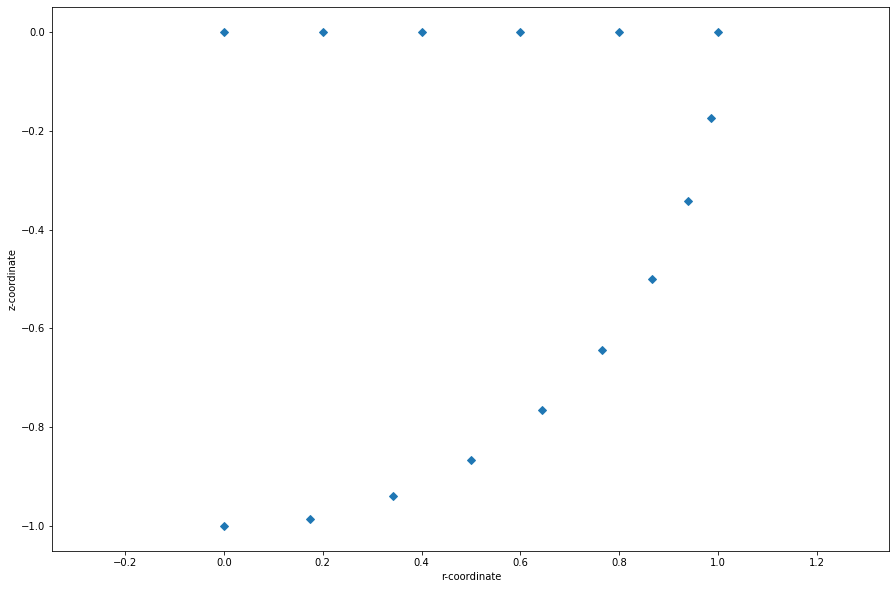

In [1]:
%%time
import abem as ab
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

f = 10.0 # Hertz
k = ab.frequency_to_wavenumber(f)

solver = ab.RayleighCavitySolverRAD(ab.truncated_sphere_rad())
print("numberOfElements = {}".format(solver.len()))
print("numberOfInterfaceElements = {}".format(solver.number_of_interface_elements()))

boundary_condition = solver.neumann_boundary_condition()
boundary_condition.f.fill(-1.0)

exterior_points = np.array([[0.000, 0.100],
                           [0.000, 0.300],
                           [0.000, 0.500],
                           [0.000, 0.700],
                           [0.000, 0.900]], dtype=np.float32)

interior_points = np.array([[0.000, -0.900],
                           [0.000, -0.700],
                           [0.000, -0.500],
                           [0.000, -0.300],
                           [0.000, -0.100]], dtype=np.float32)

solution = solver.solve_boundary(k, boundary_condition)

print(solution)

interior_phi = solution.solve_cavity(interior_points)
print("Sound pressure at the interior points\n")
print(interior_phi)

exterior_phi = solution.solve_samples(exterior_points)
print("Sound pressure at the exterior points\n")
print(exterior_phi)

chain = ab.truncated_sphere_rad()
fig, ax = plt.subplots(figsize = (15, 10))
ax.plot(chain.vertices[:,0], chain.vertices[:,1], 'D', label='verts')
ax.set_aspect('equal', 'datalim')
ax.set_xlabel('r-coordinate')
ax.set_ylabel('z-coordinate')